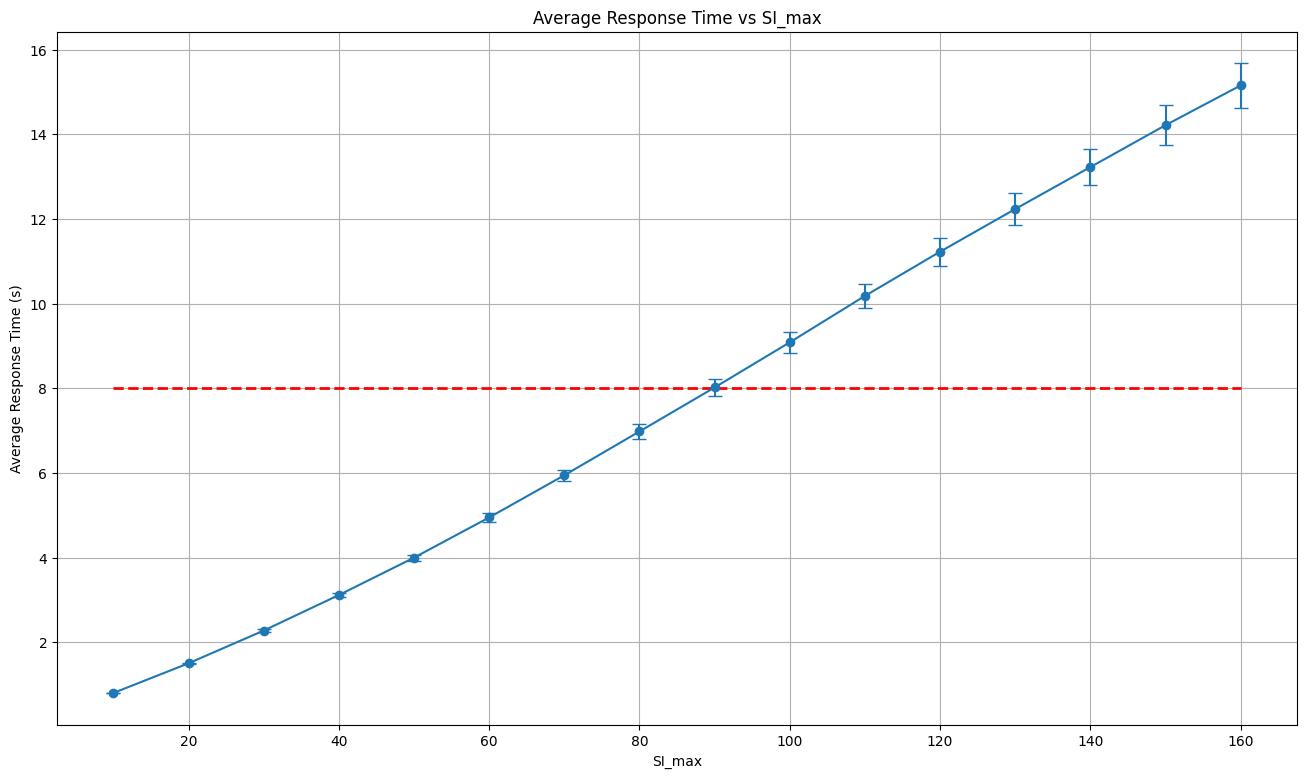

In [24]:
import pandas as pd
# Prendo il csv e lo converto in pandas
data = pd.read_csv('data/experiment_si_max.csv')
data["sla_total_response_time"] = 8.0
# faccio un plot
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.errorbar(data['SI_max'], data['total_response_time_Mean'], yerr=data['total_response_time_CI95'], marker='o', capsize=5)
plt.plot(data['SI_max'], data["sla_total_response_time"], linestyle='--', color='red', linewidth=2, label='SLA: 8s')
plt.title('Average Response Time vs SI_max')
plt.xlabel('SI_max')
plt.ylabel('Average Response Time (s)')
plt.grid()
plt.savefig('../docs/images/response_time_vs_si_max.png')
plt.show()

# Salvo i dati utilizzati nel grafico in un file csv
df = data[['SI_max', 'total_response_time_Mean', 'total_response_time_CI95']]

# rinomino le colonne togliendo gli underscore e mettendo gli spazi 
df.columns = ['SI max', 'Total Response Time Mean', 'Total Response Time CI95']
df.to_csv('../docs/data_tables/response_time_vs_si_max.csv', index=False)


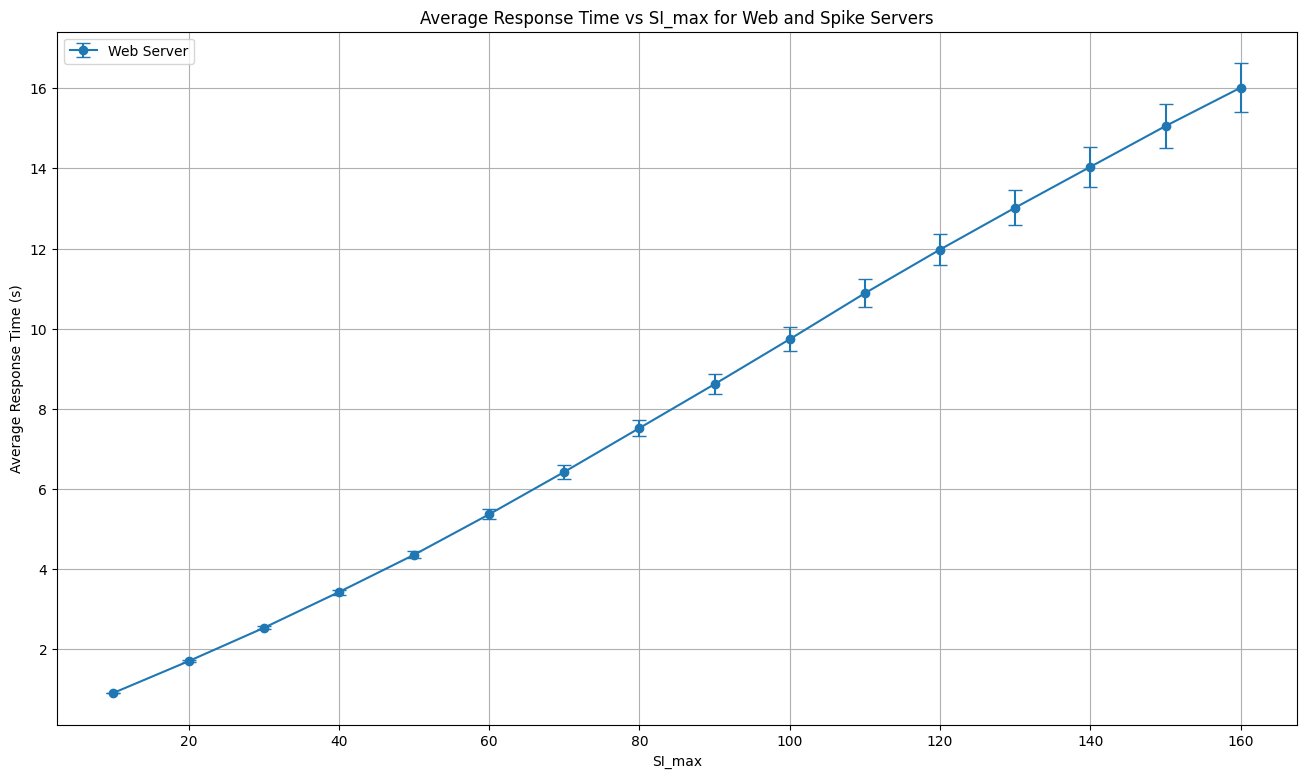

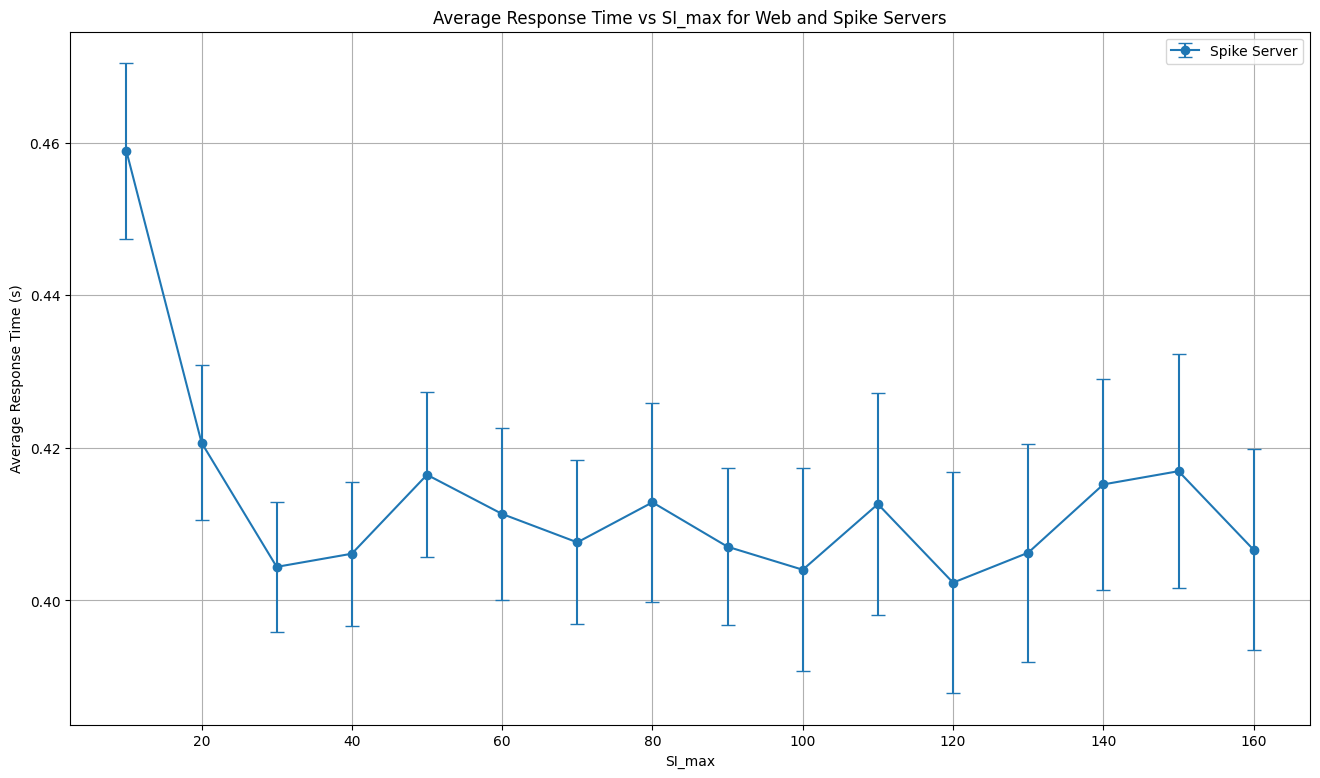

In [30]:
# Validazione dati response time web e spike server

import pandas as pd
# Prendo il csv e lo converto in pandas
data = pd.read_csv('data/experiment_si_max.csv')

# faccio due plot   
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.errorbar(data['SI_max'], data['web_response_time_Mean'], yerr=data['web_response_time_CI95'], marker='o', capsize=5, label='Web Server')
plt.title('Average Response Time vs SI_max for Web and Spike Servers')
plt.xlabel('SI_max')
plt.ylabel('Average Response Time (s)')
plt.grid()
plt.legend()
plt.savefig('../docs/images/response_time_web_spike_vs_si_max.png')
plt.show()

plt.figure(figsize=(16,9))
plt.errorbar(data['SI_max'], data['spike_response_time_Mean'], yerr=data['spike_response_time_CI95'], marker='o', capsize=5, label='Spike Server')
plt.title('Average Response Time vs SI_max for Web and Spike Servers')
plt.xlabel('SI_max')
plt.ylabel('Average Response Time (s)')
plt.grid()
plt.legend()
plt.savefig('../docs/images/response_time_spike_vs_si_max.png')
plt.show()


# Salvo i dati utilizzati nel grafico in un file csv
df_web = data[['SI_max', 'web_response_time_Mean', 'web_response_time_CI95']]
df_spike = data[['SI_max', 'spike_response_time_Mean', 'spike_response_time_CI95']] 

# rinomino le colonne togliendo gli underscore e mettendo gli spazi
df_web.columns = ['SI max', 'Web Response Time Mean', 'Web Response Time CI95']
df_spike.columns = ['SI max', 'Spike Response Time Mean', 'Spike Response Time CI95']

df_web.to_csv('../docs/data_tables/response_time_web_vs_si_max.csv', index=False)
df_spike.to_csv('../docs/data_tables/response_time_spike_vs_si_max.csv', index=False)

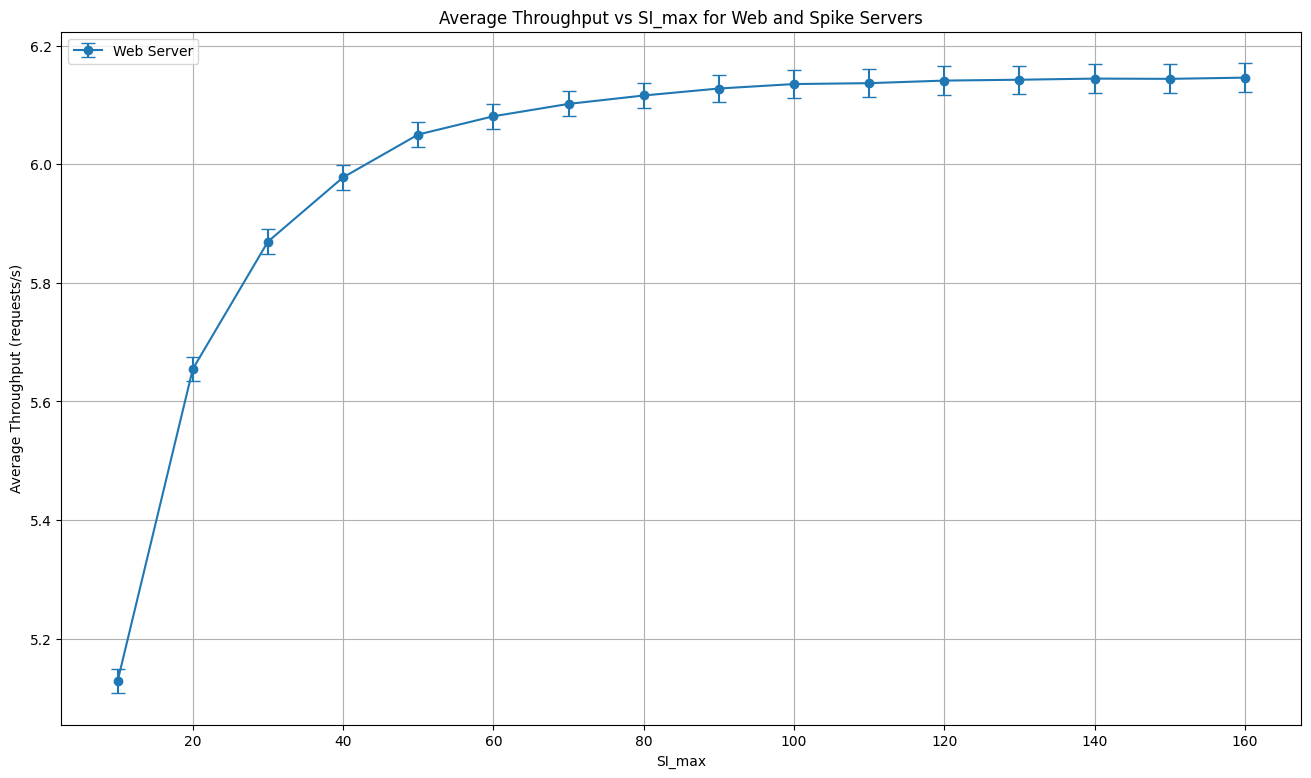

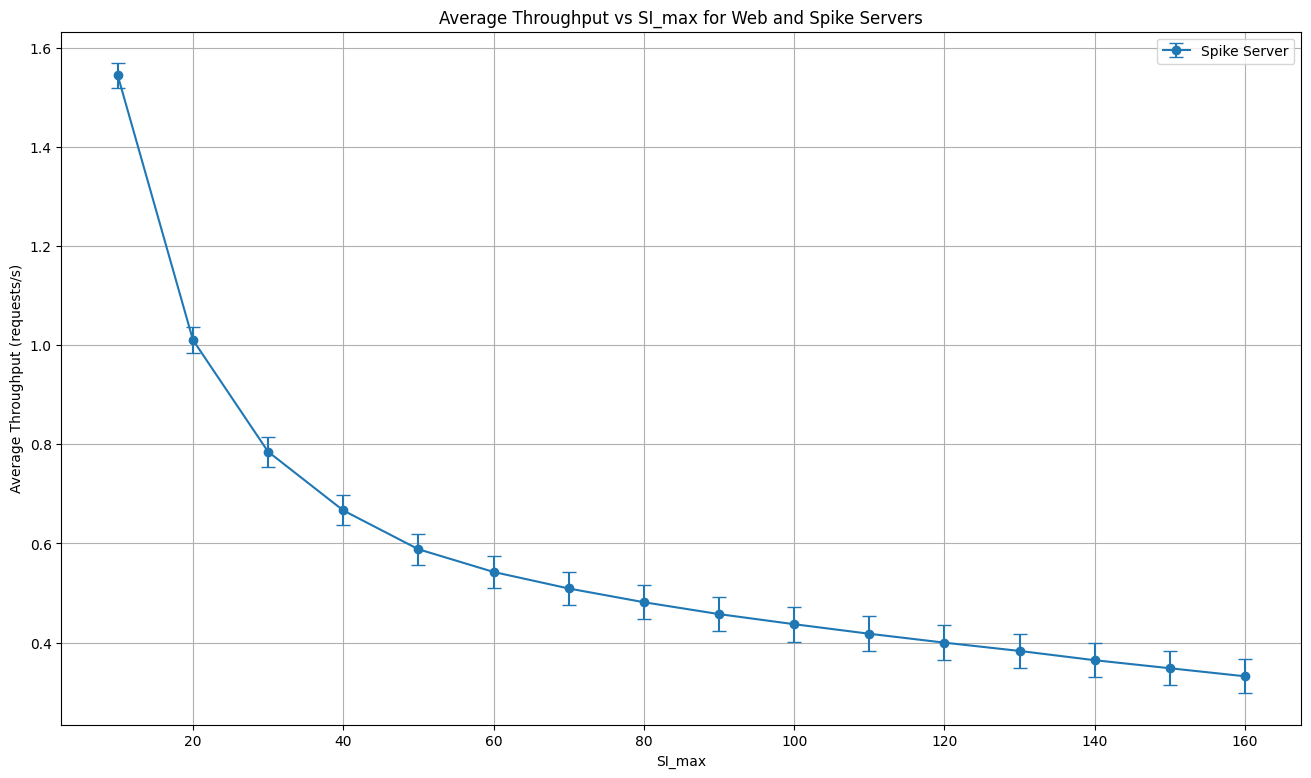

In [32]:
# Test throughput 

# Validazione dati response time web e spike server

import pandas as pd
# Prendo il csv e lo converto in pandas
data = pd.read_csv('data/experiment_si_max.csv')

# faccio due plot   
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.errorbar(data['SI_max'], data['throughput_web_Mean'], yerr=data['throughput_web_CI95'], marker='o', capsize=5, label='Web Server')
plt.title('Average Throughput vs SI_max for Web and Spike Servers')
plt.xlabel('SI_max')
plt.ylabel('Average Throughput (requests/s)')
plt.grid()
plt.legend()
plt.savefig('../docs/images/throughput_web_vs_si_max.png')
plt.show()

plt.figure(figsize=(16,9))
plt.errorbar(data['SI_max'], data['throughput_spike_Mean'], yerr=data['throughput_spike_CI95'], marker='o', capsize=5, label='Spike Server')
plt.title('Average Throughput vs SI_max for Web and Spike Servers')
plt.xlabel('SI_max')
plt.ylabel('Average Throughput (requests/s)')
plt.grid()
plt.legend()
plt.savefig('../docs/images/throughput_spike_vs_si_max.png')
plt.show()

# Salvo i dati utilizzati nel grafico in un file csv
df = data[['SI_max', 'throughput_web_Mean', 'throughput_web_CI95']]
df_spike = data[['SI_max', 'throughput_spike_Mean', 'throughput_spike_CI95']]
# rinomino le colonne togliendo gli underscore e mettendo gli spazi
df.columns = ['SI max', 'Web Throughput Mean', 'Web Throughput CI95']
df_spike.columns = ['SI max', 'Spike Throughput Mean', 'Spike Throughput CI95']

df.to_csv('../docs/data_tables/throughput_web_vs_si_max.csv', index=False)
df_spike.to_csv('../docs/data_tables/throughput_spike_vs_si_max.csv', index=False)

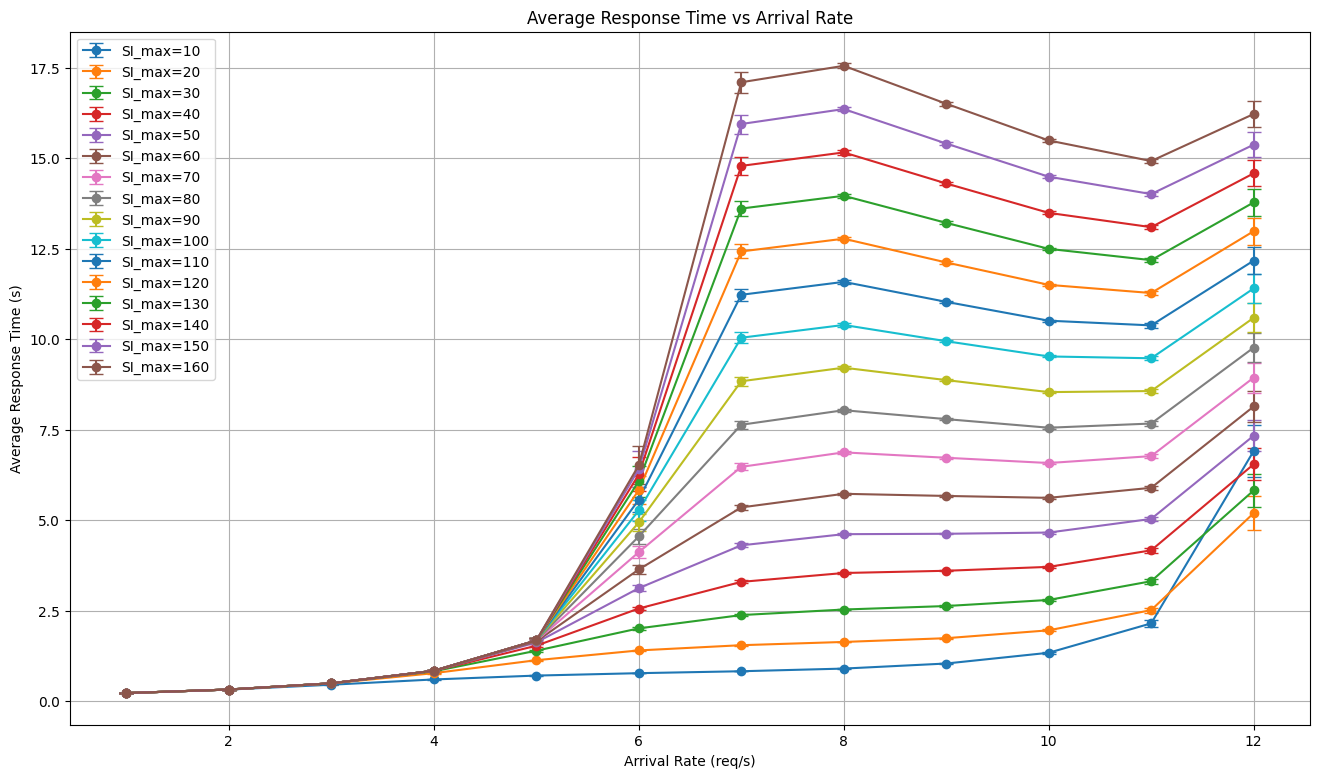

In [38]:
import pandas as pd
# Prendo il csv e lo converto in pandas
data = pd.read_csv('data/experiment_stress_test.csv')

# faccio un plot
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
# Faccio un plot per ogni SI_max presente nel dataset
for si_max in data['SI_max'].unique():
    subset = data[data['SI_max'] == si_max]
    plt.errorbar(subset['Arrival_Rate'], subset['total_response_time_Mean'], yerr=subset['total_response_time_CI95'], marker='o', capsize=5, label=f'SI_max={si_max}')
plt.title('Average Response Time vs Arrival Rate')
plt.xlabel('Arrival Rate (req/s)')
plt.ylabel('Average Response Time (s)')
plt.grid()
plt.legend()
plt.savefig('../docs/images/response_time_vs_arrival_rate_vs_si_max.png')
plt.show()

# Salvo i dati utilizzati nel grafico in un file csv
df = data[['SI_max', 'Arrival_Rate', 'total_response_time_Mean', 'total_response_time_CI95']]
# Prendo solo i valori di SI_max a multipli di 20
df = df[df['SI_max'] % 20 == 0]

# rinomino le colonne togliendo gli underscore e mettendo gli spazi
df.columns = ['SI max', 'Arrival Rate', 'Total Response Time Mean', 'Total Response Time CI95']

# divido il file in due, uno con solo SI_max <= 80 e uno con SI_max > 80
df1 = df[df['SI max'] <= 80]
df2 = df[df['SI max'] > 80]

df1.to_csv('../docs/data_tables/response_time_vs_arrival_rate_vs_si_max_1.csv', index=False)
df2.to_csv('../docs/data_tables/response_time_vs_arrival_rate_vs_si_max_2.csv', index=False)

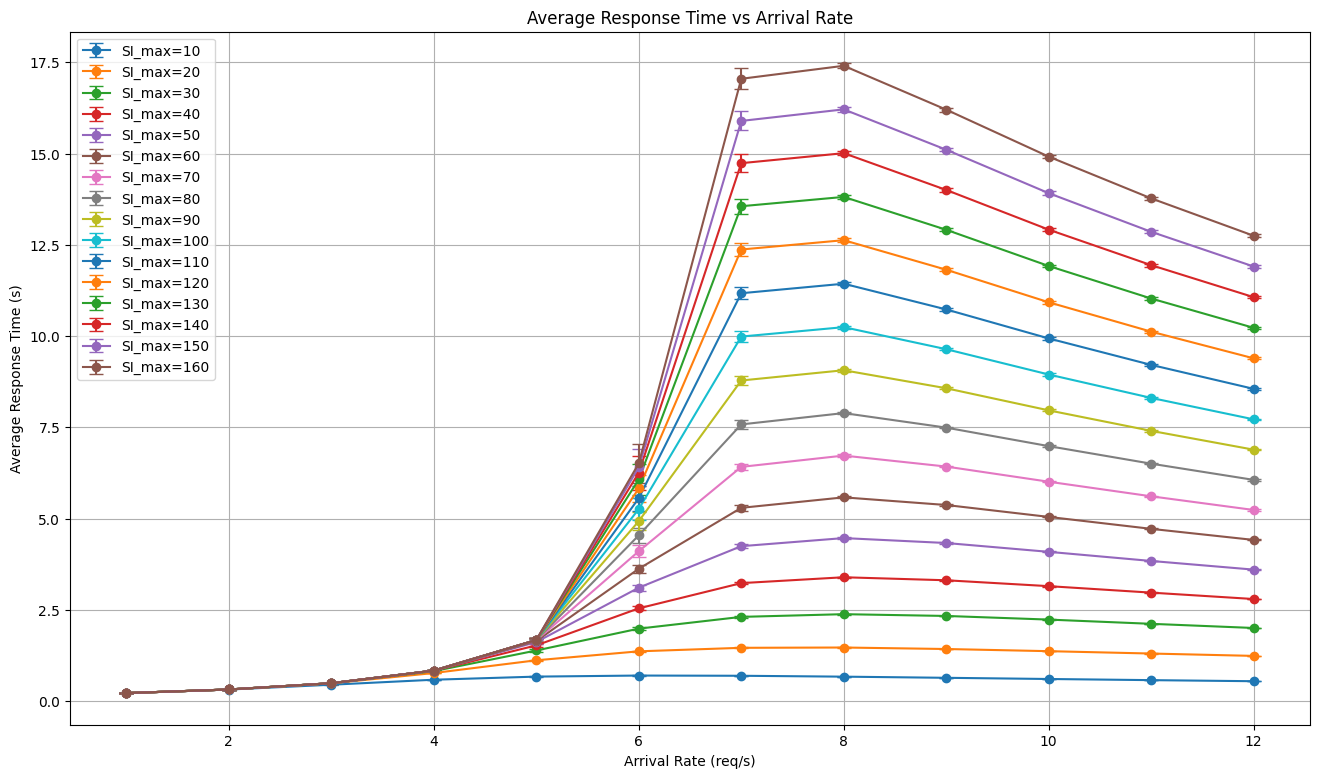

In [37]:
import pandas as pd
# Prendo il csv e lo converto in pandas
data = pd.read_csv('data/experiment_stress_test_enhanced_spike.csv')

# faccio un plot
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
# Faccio un plot per ogni SI_max presente nel dataset
for si_max in data['SI_max'].unique():
    subset = data[data['SI_max'] == si_max]
    plt.errorbar(subset['Arrival_Rate'], subset['total_response_time_Mean'], yerr=subset['total_response_time_CI95'], marker='o', capsize=5, label=f'SI_max={si_max}')
plt.title('Average Response Time vs Arrival Rate')
plt.xlabel('Arrival Rate (req/s)')
plt.ylabel('Average Response Time (s)')
plt.grid()
plt.legend()
plt.savefig('../docs/images/response_time_vs_arrival_rate_vs_si_max_enhanced_spike.png')
plt.show()

# Salvo i dati utilizzati nel grafico in un file csv
df = data[['SI_max', 'Arrival_Rate', 'total_response_time_Mean', 'total_response_time_CI95']]
# Prendo solo i valori di SI_max a multipli di 20
df = df[df['SI_max'] % 20 == 0]

# rinomino le colonne togliendo gli underscore e mettendo gli spazi
df.columns = ['SI max', 'Arrival Rate', 'Total Response Time Mean', 'Total Response Time CI95']

#divido in due df, uno da 10 a 80 e uno da 90 a 160
df1 = df[df['SI max'] <= 80]
df2 = df[df['SI max'] >= 90]

df1.to_csv('../docs/data_tables/response_time_vs_arrival_rate_vs_si_max_enhanced_spike_1.csv', index=False)
df2.to_csv('../docs/data_tables/response_time_vs_arrival_rate_vs_si_max_enhanced_spike_2.csv', index=False)

## Throughput

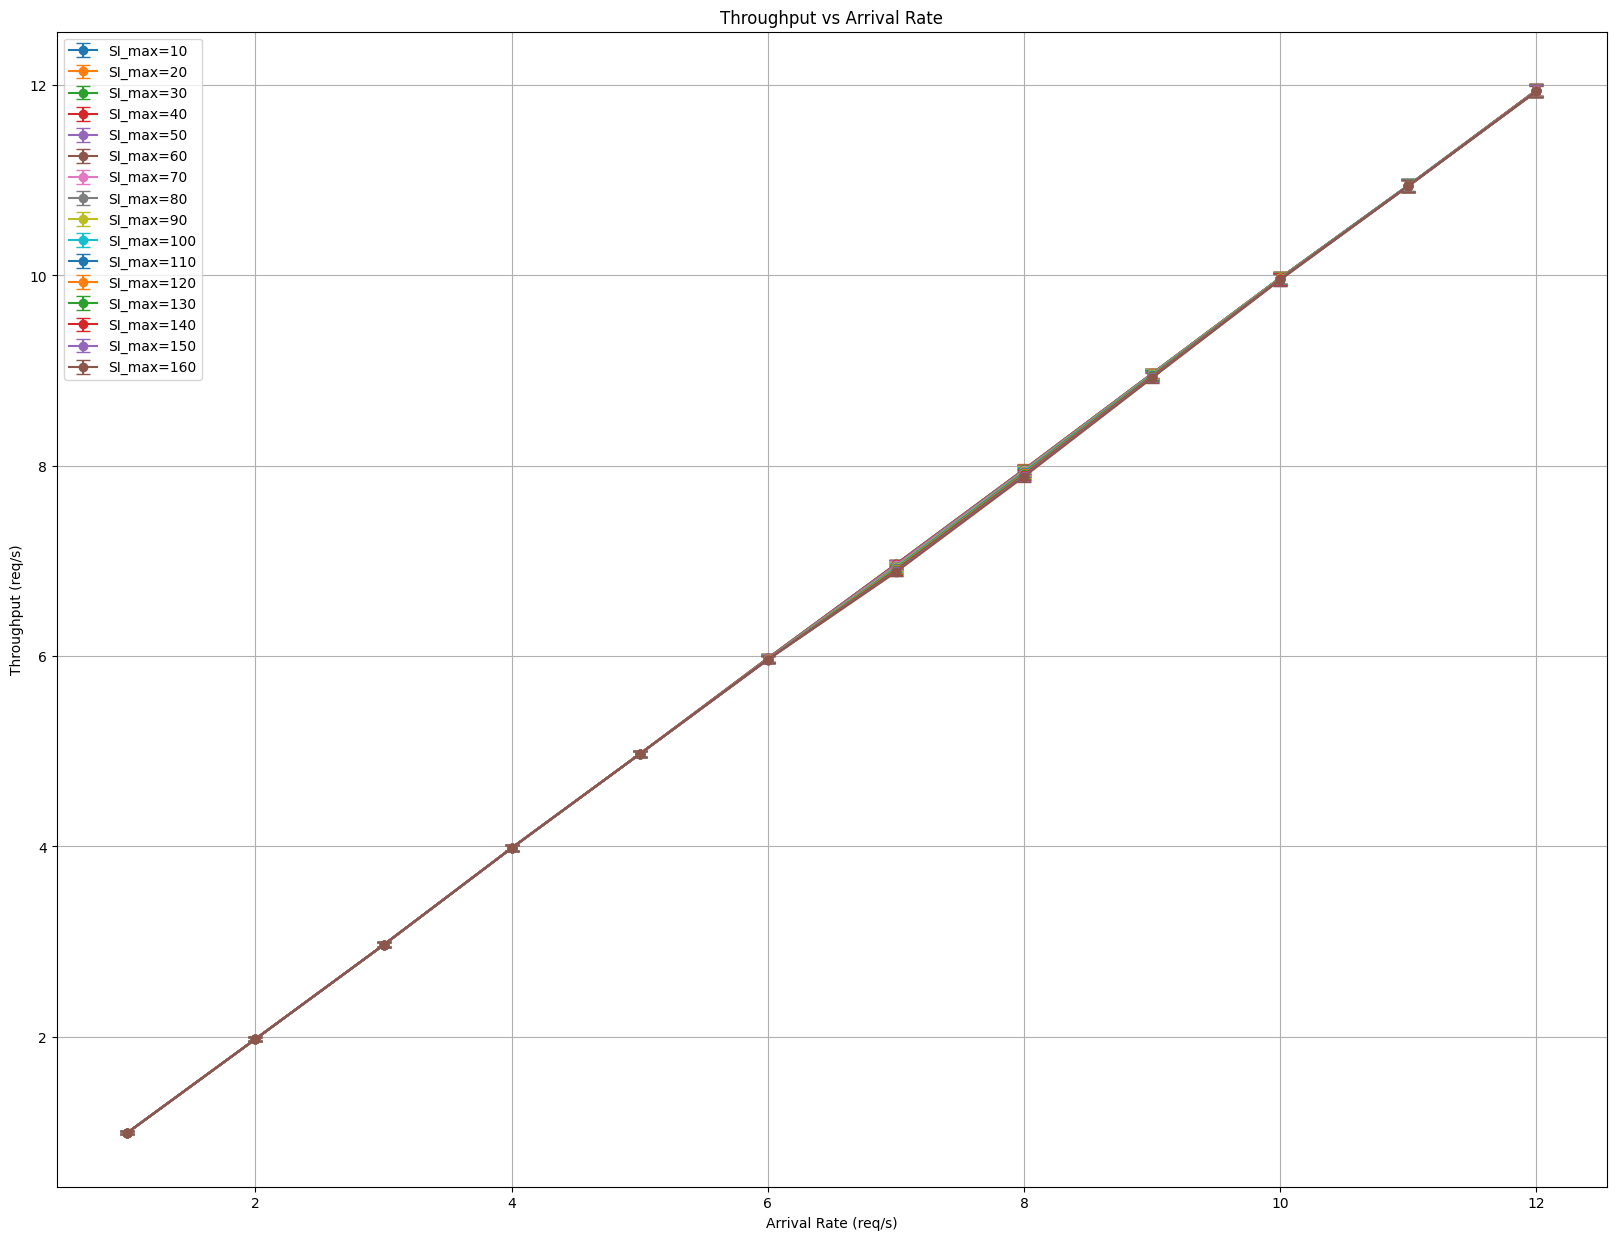

In [24]:
import pandas as pd
# Prendo il csv e lo converto in pandas
data = pd.read_csv('data/experiment_stress_test.csv')

# faccio un plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
# Faccio un plot per ogni SI_max presente nel dataset
for si_max in data['SI_max'].unique():
    subset = data[data['SI_max'] == si_max]
    plt.errorbar(subset['Arrival_Rate'], subset['throughput_total_Mean'], yerr=subset['throughput_total_CI95'], marker='o', capsize=5, label=f'SI_max={si_max}')
plt.title('Throughput vs Arrival Rate')
plt.xlabel('Arrival Rate (req/s)')
plt.ylabel('Throughput (req/s)')
plt.grid()
plt.legend()
plt.show()

## Verifica utilizzazione al variare di SI_max

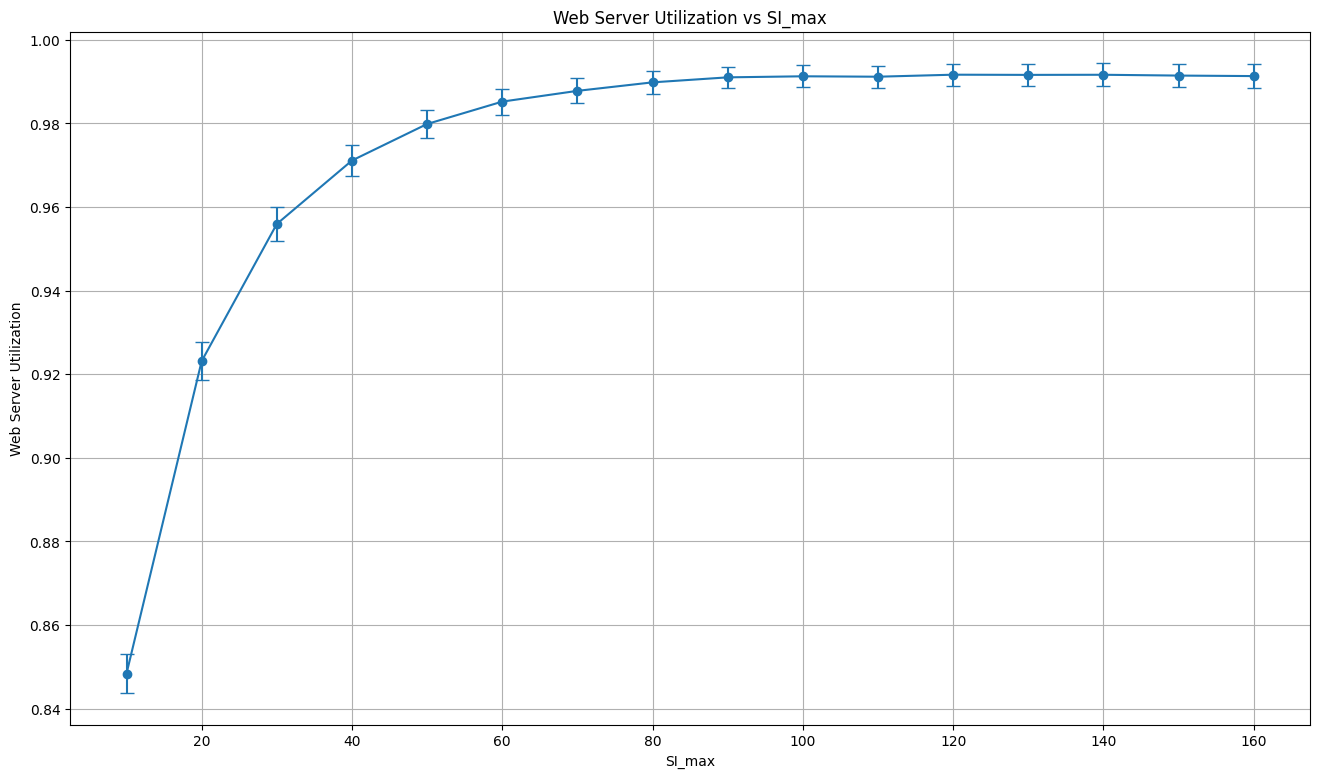

In [19]:
import pandas as pd
# Prendo il csv e lo converto in pandas
data = pd.read_csv('data/experiment_si_max.csv')

# faccio un plot
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.errorbar(data['SI_max'], data['utilization_web_Mean'], yerr=data['utilization_web_CI95'], marker='o', capsize=5)
plt.title('Web Server Utilization vs SI_max')
plt.xlabel('SI_max')
plt.ylabel('Web Server Utilization')
plt.grid()
plt.show()


# Salvo i dati utilizzati nel grafico in un file csv
df_cropped = data[['SI_max', 'utilization_web_Mean', 'utilization_web_CI95']]
# Rinomino le colonne togliendo i caratteri speciali togliendo _ e mettendo spazi, tolgo Mean
df_cropped.columns = ['SI max', 'utilization web', 'utilization web CI95']
# Salvo il csv

df_cropped.to_csv('../docs/data_tables/graph_data_si_max.csv', index=False)

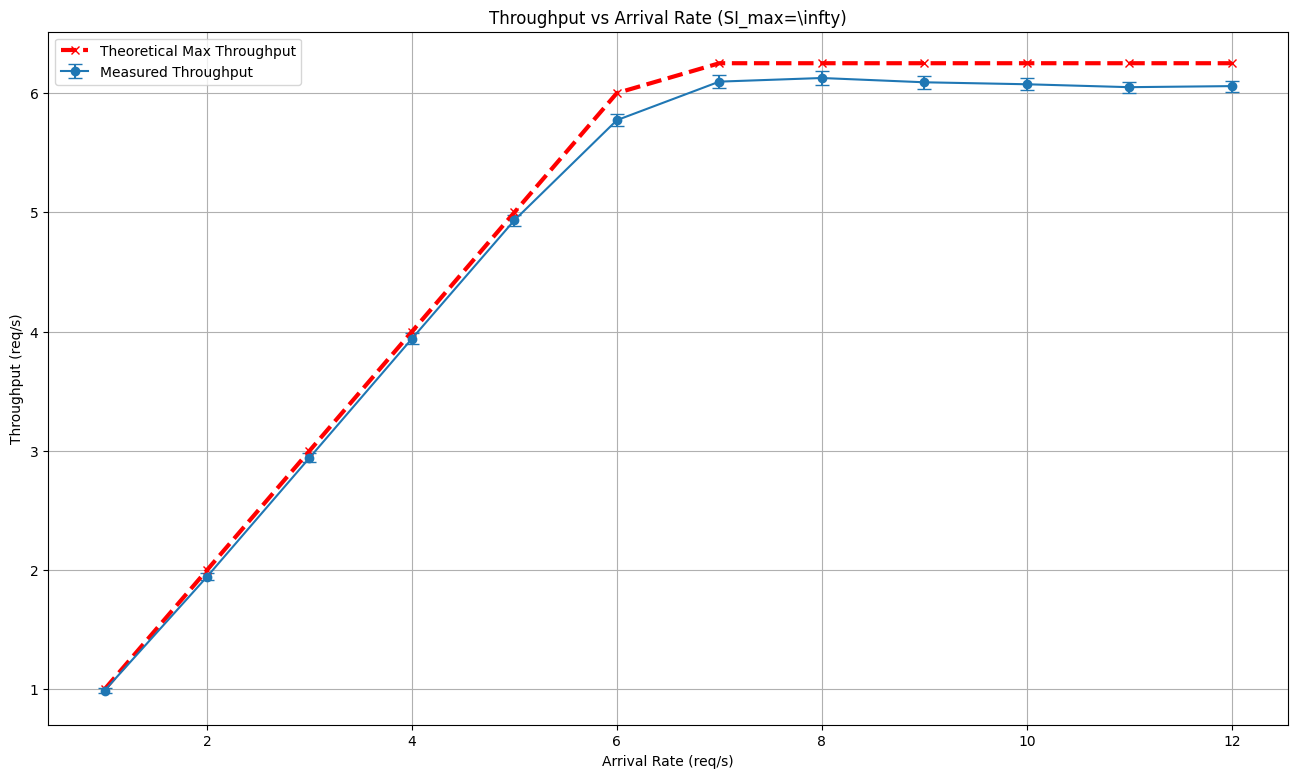

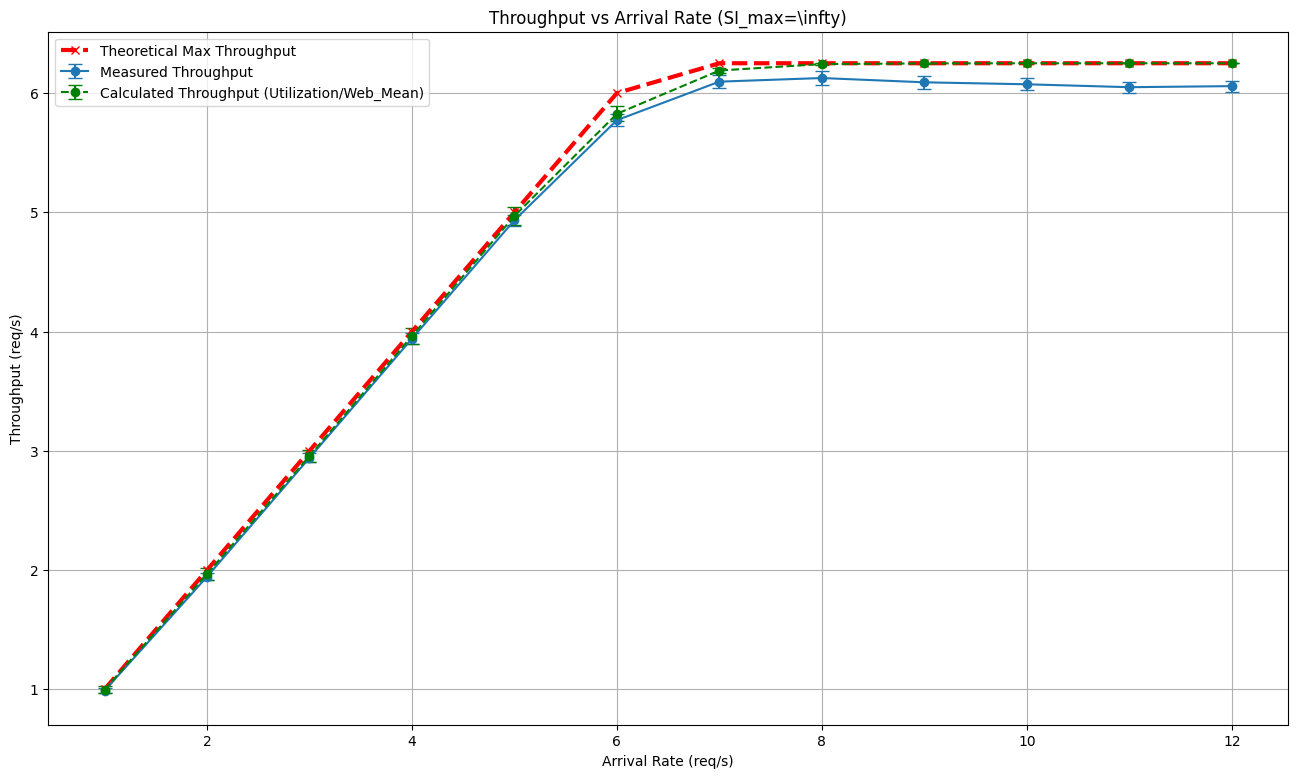

In [23]:
# verifica del throughput massimo teorico
import pandas as pd
# Prendo il csv e lo converto in pandas
data = pd.read_csv('data/experiment_inf_si_max.csv')
# calcolo il throughput massimo teorico come il minimo tra 1 / service_time_web_Mean e Arrival Rate
data['Web_service_rate'] = data['Web_Mean'].apply(lambda x: 1 / x)
data['Arrival_Rate'] = round(1 / data['Arrival_Mean'], 0)
data['theoretical_max_throughput'] = data[['Web_service_rate', 'Arrival_Rate']].min(axis=1)
data["throughput_v2"] = data['utilization_web_Mean'] / data['Web_Mean']
data["throughput_v2_CI95"] = data['utilization_web_CI95'] / data['Web_Mean']
# faccio un plot del throughput misurato vs il throughput teorico
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.errorbar(data['Arrival_Rate'], data['throughput_total_Mean'], yerr=data['throughput_total_CI95'], marker='o', capsize=5, label='Measured Throughput')
plt.plot(data['Arrival_Rate'], data['theoretical_max_throughput'], marker='x', linestyle='--', color='red', linewidth=3, label='Theoretical Max Throughput')
plt.title('Throughput vs Arrival Rate (SI_max=\infty)')
plt.xlabel('Arrival Rate (req/s)')
plt.ylabel('Throughput (req/s)')
plt.grid()
plt.legend()
# salvo la figura
plt.savefig('../docs/images/wrong_throughput.png')
plt.show()

plt.figure(figsize=(16,9))
plt.errorbar(data['Arrival_Rate'], data['throughput_total_Mean'], yerr=data['throughput_total_CI95'], marker='o', capsize=5, label='Measured Throughput')
plt.errorbar(data['Arrival_Rate'], data['throughput_v2'], yerr=data['throughput_v2_CI95'], marker='o', linestyle='--', capsize=5, color='green', label='Calculated Throughput (Utilization/Web_Mean)')
plt.plot(data['Arrival_Rate'], data['theoretical_max_throughput'], marker='x', linestyle='--', color='red', linewidth=3, label='Theoretical Max Throughput')
plt.title('Throughput vs Arrival Rate (SI_max=\infty)')
plt.xlabel('Arrival Rate (req/s)')
plt.ylabel('Throughput (req/s)')
plt.grid()
plt.legend()
# salvo la figura
plt.savefig('../docs/images/correct_throughput.png')
plt.show()

# Salvo i dati utilizzati nel grafico in un file csv
df_cropped = data[['Arrival_Rate', 'throughput_total_Mean', 'throughput_total_CI95', 'theoretical_max_throughput']]
# Rinomino le colonne togliendo i caratteri speciali togliendo _ e mettendo spazi, tolgo Mean
df_cropped.columns = ['Arrival Rate', 'throughput measured', 'throughput measured CI95', 'theoretical max throughput']


df_cropped.to_csv('../docs/data_tables/data_throughput_si_max_inf.csv', index=False)